# Assignment:
1. Plot performance vs. time for GradientBoost (using decision trees). Pick a cutoff number of models.
2. Plot Performance vs. Number of Input Points for K-NN and GradientBoost.
3. Plot Time vs. Number of Input Points for K-NN, Adaboost, and Ridge Regression.

# Stretch Goals:
- Run the tests multiple times and compute means and standard deviations. Plot 95% confidence regions around each curve.
- Run the experiment with other regression models from sklearn.

100%|██████████| 100/100 [00:00<00:00, 127.37it/s]


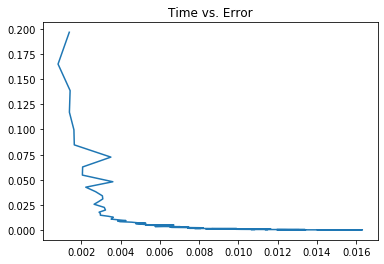

In [46]:
import numpy as np
import time
from tqdm import trange
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
%matplotlib inline

data = np.loadtxt('test_data.csv', delimiter=',')

Xs = data[:,0:1]
Ys = data[:,2]

accuracies = []
timings = []

t = trange(100)
for i in t:
    start = time.time()
    model = GradientBoostingRegressor(n_estimators=i+1)
    model.fit(Xs, Ys)
    stop = time.time()
    predictions = model.predict(Xs)
    accuracies.append(mean_squared_error(Ys, predictions))
    timings.append(stop - start)

plt.plot(timings, accuracies)
plt.title("Time vs. Error")
plt.show()

100%|██████████| 29/29 [00:00<00:00, 143.04it/s]


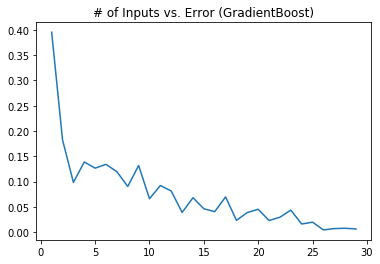

In [45]:
import random

accuracies = []
timings = []

for i in trange(1, Xs.shape[0]):
    indices = random.sample(range(Xs.shape[0]), i)
    Xs_sub = Xs[indices]
    Ys_sub = Ys[indices]

    start = time.time()
    model = GradientBoostingRegressor(n_estimators=40)
    model.fit(Xs_sub, Ys_sub)
    stop = time.time()
    predictions = model.predict(Xs)
    accuracies.append(mean_squared_error(Ys, predictions))
    timings.append(stop - start)

plt.plot(range(1, Xs.shape[0]), accuracies)
plt.title("# of Inputs vs. Error (GradientBoost)")
plt.show()

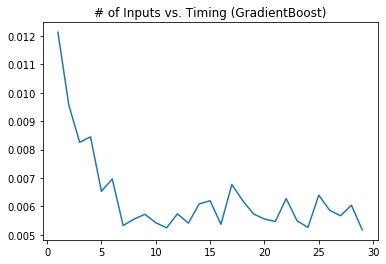

In [36]:
plt.plot(range(1, Xs.shape[0]), timings)
plt.title("# of Inputs vs. Timing (GradientBoost)")
plt.show()

100%|██████████| 27/27 [00:00<00:00, 809.43it/s]


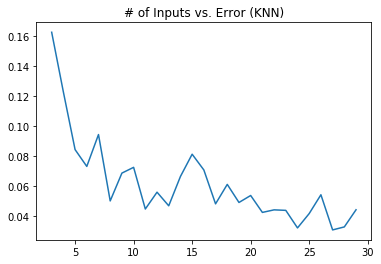

In [44]:
from sklearn.neighbors import KNeighborsRegressor

accuracies = []
timings = []

for i in trange(3, Xs.shape[0]):
    indices = random.sample(range(Xs.shape[0]), i)
    Xs_sub = Xs[indices]
    Ys_sub = Ys[indices]

    start = time.time()
    model = KNeighborsRegressor(n_neighbors=2)
    model.fit(Xs_sub, Ys_sub)
    stop = time.time()
    predictions = model.predict(Xs)
    accuracies.append(mean_squared_error(Ys, predictions))
    timings.append(stop - start)

plt.plot(range(3, Xs.shape[0]), accuracies)
plt.title("# of Inputs vs. Error (KNN)")
plt.show()

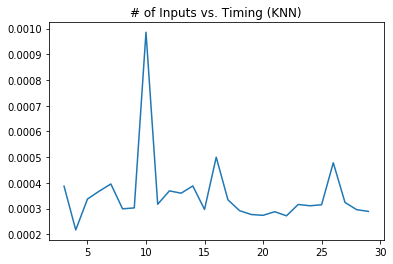

In [43]:
plt.plot(range(3, Xs.shape[0]), timings)
plt.title("# of Inputs vs. Timing (KNN)")
plt.show()